# Load Dataset

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Episodes data
episodes_url = "https://drive.google.com/uc?export=download&id=1Q2s1TZAl1epx_-hi8yXWQv12UJGt_LYe"
episodes_data = pd.read_csv(episodes_url)

# Loadouts data
loadouts_url = "https://drive.google.com/uc?export=download&id=1xym94LM-MIvEWI-IauIJViR4mXaqMiB0"
loadouts_data = pd.read_csv(loadouts_url)

# Seasons data
seasons_url = "https://drive.google.com/uc?export=download&id=1M1cEpgPXD1PTLywN2JD7Dn8-QEWcUfWQ"
seasons_data = pd.read_csv(seasons_url)

# Survivalists data
survivalists_url = "https://drive.google.com/uc?export=download&id=1L600G_6QA1XVZGKl3Ky5AC9FWC4Uu3po"
survivalists_data = pd.read_csv(survivalists_url)
# View first few rows
print(episodes_data.head())
print(loadouts_data.head())
print(seasons_data.head())
print(survivalists_data.head())

  version  season  episode_number_overall  episode               title  \
0      US       1                       1        1    And So It Begins   
1      US       1                       2        2     Of Wolf and Man   
2      US       1                       3        3  The Talons of Fear   
3      US       1                       4        4             Stalked   
4      US       1                       5        5       Winds of Hell   

     air_date  viewers                                              quote  \
0  2015-06-18    1.582  I went to the woods because I wished to live d...   
1  2015-06-25    1.697  If you live among wolves you have to act like ...   
2  2015-07-02    1.864  Extinction is the rule. Survival is the except...   
3  2015-07-09    2.082  Hunger, love, pain, fear are some of those inn...   
4  2015-07-16    2.082    The strong survive, but the courageous triumph.   

                author  imdb_rating  n_ratings  
0  Henry David Thoreau          7.5      13

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


# Data Preprocessing

In [ ]:
# Standardize column names
def standardize_columns(df):
    df = df.copy()
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("[", "", regex=False)
        .str.replace("]", "", regex=False)
    )
    return df

loadouts = standardize_columns(loadouts_data)
survivalists = standardize_columns(survivalists_data)

# Merge loadouts with contestant outcomes for later interpretation
df = loadouts.merge(
    survivalists[['season','name','days_lasted','medically_evacuated','reason_category','gender','age']],
    on=['season','name'],
    how='left'
)

print("Merged data shape:", df.shape)
print("\nMissing values:")
print(df.isna().mean().sort_values(ascending=False).head())

Merged data shape: (940, 11)

Missing values:
reason_category    0.106383
season             0.000000
version            0.000000
name               0.000000
item_number        0.000000
dtype: float64


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# Create basket format (binary matrix)
# Each row = one contestant's loadout
# Each column = one item type
# Values = 1 if item present, 0 if not

basket = (df.assign(val=1)
            .pivot_table(index=['season','name'],
                        columns='item',
                        values='val',
                        aggfunc='max',
                        fill_value=0))

print("Basket dimensions:", basket.shape)
print(f"Number of contestants: {basket.shape[0]}")
print(f"Number of unique items: {basket.shape[1]}")
print("\nBasket preview:")
display(basket.head(10))

Basket dimensions: (94, 27)
Number of contestants: 94
Number of unique items: 27

Basket preview:


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

item                     Axe  Bivy bag  Bow and arrows  Canteen  Ferro rod  \
season name                                                                  
1      Alan Kay            1         0               0        1          1   
       Brant McGee         1         0               1        0          1   
       Chris Weatherman    1         0               1        1          1   
       Dustin Feher        1         0               0        1          1   
       Joe Robinet         1         0               0        0          1   
       Josh Chavez         1         0               1        0          1   
       Lucas Miller        1         0               0        0          1   
       Mitch Mitchell      1         1               1        0          1   
       Sam Larson          1         0               1        0          1   
       Wayne Russell       1         0               0        0          1   

item                     Fishing gear  Frying pan  Gillnet  Ground sheet  \
season name                                                                
1      Alan Kay                     1           0        1             0   
       Brant McGee                  1           0        0             0   
       Chris Weatherman             1           0        0             0   
       Dustin Feher                 1           0        1             0   
       Joe Robinet                  1           0        1             0   
       Josh Chavez                  1           0        0             1   
       Lucas Miller                 1           0        0             0   
       Mitch Mitchell               1           0        1             0   
       Sam Larson                   1           0        0             0   
       Wayne Russell                1           0        0             1   

item                     Hammock  ...  Saw  Scotch eyed auger  \
season name                       ...                           
1      Alan Kay                0  ...    1                  0   
       Brant McGee             0  ...    0                  0   
       Chris Weatherman        0  ...    1                  0   
       Dustin Feher            0  ...    0                  0   
       Joe Robinet             0  ...    0                  0   
       Josh Chavez             0  ...    1                  0   
       Lucas Miller            0  ...    1                  0   
       Mitch Mitchell          0  ...    0                  0   
       Sam Larson              0  ...    0                  0   
       Wayne Russell           0  ...    1                  0   

item                     Sharpening stone  Shovel  Sleeping bag  Slingshot  \
season name                                                                  
1      Alan Kay                         0       0             1          0   
       Brant McGee                      0       0             1          0   
       Chris Weatherman                 1       0             1          0   
       Dustin Feher                     0       0             1          1   
       Joe Robinet                      0       0             1          0   
       Josh Chavez                      0       0             1          0   
       Lucas Miller                     0       0             1          0   
       Mitch Mitchell                   1       0             1          0   
       Sam Larson                       0       0             1          1   
       Wayne Russell                    0       0             1          0   

item                     Soap  Tarp  Trapping wire  Wire  
season name                                               
1      Alan Kay             0     0              0     1  
       Brant McGee          0     1              0     0  
       Chris Weatherman     0     0              0     0  
       Dustin Feher         0     0              0     0  
       Joe Robinet          0     1              0     0  
       Josh Chavez 

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

# Preprocessing

In [ ]:
basket = (df.assign(val=1)
            .pivot_table(index=['season','name'], columns='item', values='val', aggfunc='max', fill_value=0))

# Attach outcomes for later interpretation
outcomes = (survivalists.set_index(['season','name'])
            [['days_lasted','medically_evacuated','reason_category','gender','age']])

X = basket.join(outcomes, how='left')


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

# EDA Item Frequencies

In [ ]:
# Calculate item frequencies
item_freq = basket.sum(axis=0).sort_values(ascending=False)
item_pct = (item_freq / len(basket) * 100).round(2)

freq_df = pd.DataFrame({
    'item': item_freq.index,
    'count': item_freq.values,
    'percent': item_pct.values
})

print("Top 10 Most Popular Items:")
display(freq_df.head(10))

print("\nBottom 10 Least Popular Items:")
display(freq_df.tail(10))

Top 10 Most Popular Items:


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,item,count,percent
0,Fishing gear,90,95.74
1,Pot,90,95.74
2,Sleeping bag,82,87.23
3,Axe,80,85.11
4,Saw,78,82.98
5,Ferro rod,77,81.91
6,Bow and arrows,60,63.83
7,Paracord,56,59.57
8,Rations,55,58.51
9,Knife,50,53.19



Bottom 10 Least Popular Items:


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,item,count,percent
17,Sharpening stone,4,4.26
18,Wire,3,3.19
19,Slingshot,3,3.19
20,Ground sheet,2,2.13
21,Hammock,2,2.13
22,Salt,2,2.13
23,Soap,2,2.13
24,Rope,1,1.06
25,Scotch eyed auger,1,1.06
26,Shovel,1,1.06


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

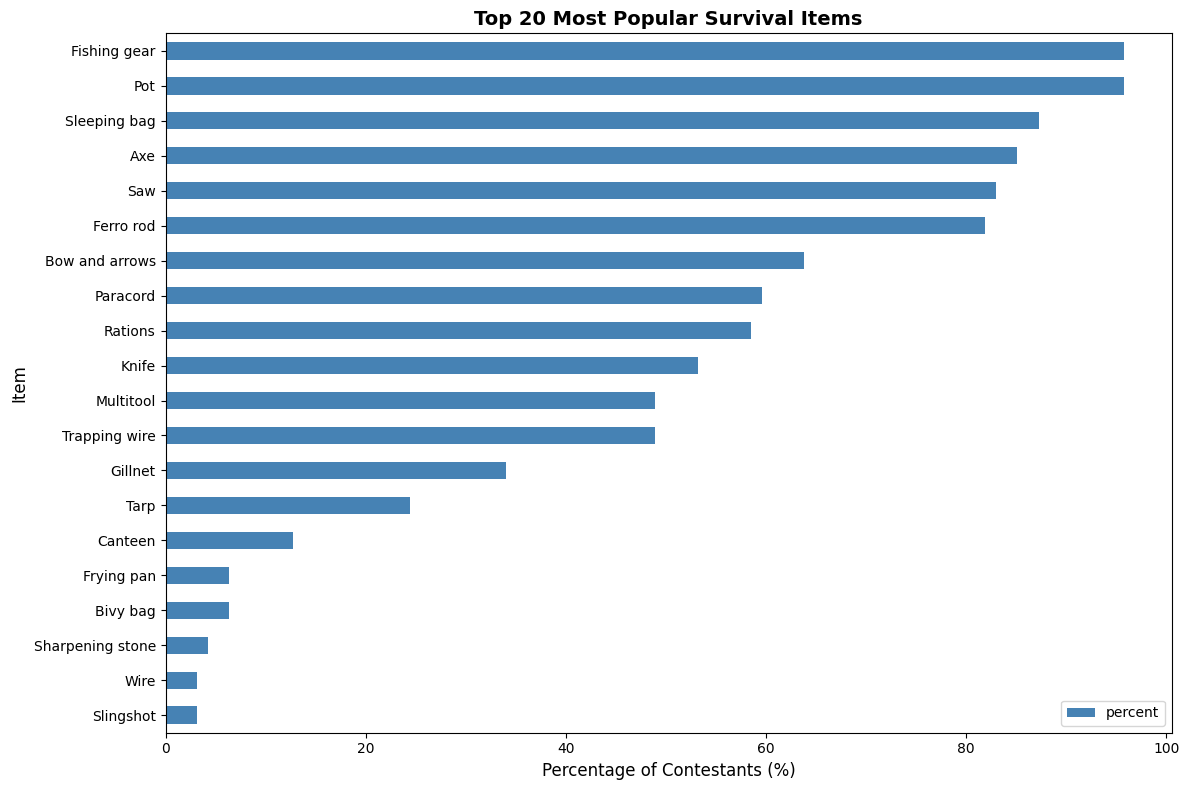

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# Visualizing this
fig, ax = plt.subplots(figsize=(12, 8))
freq_df.head(20).plot(x='item', y='percent', kind='barh', ax=ax, color='steelblue')
ax.set_xlabel('Percentage of Contestants (%)', fontsize=12)
ax.set_ylabel('Item', fontsize=12)
ax.set_title('Top 20 Most Popular Survival Items', fontsize=14, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

# Apriori Algorithm

For this, I decided to go with the following threshholds:
1. **Low threshold (0.10)**: Captures rare but potentially interesting combinations
2. **Medium threshold (0.20)**: Balanced view of moderately common patterns
3. **High threshold (0.30)**: Only very common, core strategies

In [ ]:
# Apriori with low minimum support
frequent_itemsets_low = apriori(basket, min_support=0.10, use_colnames=True)
frequent_itemsets_low['length'] = frequent_itemsets_low['itemsets'].apply(lambda x: len(x))

print(f"Total frequent itemsets found: {len(frequent_itemsets_low)}")
print(f"\nItemsets by size:")
print(frequent_itemsets_low.groupby('length').size())

print("\nTop 10 frequent itemsets (by support):")
display(frequent_itemsets_low.sort_values('support', ascending=False).head(10))

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Total frequent itemsets found: 2068

Itemsets by size:
length
1      15
2      89
3     272
4     499
5     564
6     393
7     174
8      51
9      10
10      1
dtype: int64

Top 10 frequent itemsets (by support):


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,support,itemsets,length
9,0.957447,(Pot),1
4,0.957447,(Fishing gear),1
57,0.925532,"(Pot, Fishing gear)",2
12,0.872340,(Sleeping bag),1
0,0.851064,(Axe),1
92,0.829787,"(Pot, Sleeping bag)",2
60,0.829787,"(Fishing gear, Sleeping bag)",2
11,0.829787,(Saw),1
51,0.819149,"(Ferro rod, Sleeping bag)",2
17,0.819149,"(Fishing gear, Axe)",2


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# Apriori with low minimum support
frequent_itemsets_low = apriori(basket, min_support=0.10, use_colnames=True)
frequent_itemsets_low['length'] = frequent_itemsets_low['itemsets'].apply(lambda x: len(x))

print(f"Total frequent itemsets found: {len(frequent_itemsets_low)}")
print(f"\nItemsets by size:")
print(frequent_itemsets_low.groupby('length').size())

print("\nTop 10 frequent itemsets (by support):")
display(frequent_itemsets_low.sort_values('support', ascending=False).head(10))

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Total frequent itemsets found: 2068

Itemsets by size:
length
1      15
2      89
3     272
4     499
5     564
6     393
7     174
8      51
9      10
10      1
dtype: int64

Top 10 frequent itemsets (by support):


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,support,itemsets,length
9,0.957447,(Pot),1
4,0.957447,(Fishing gear),1
57,0.925532,"(Pot, Fishing gear)",2
12,0.872340,(Sleeping bag),1
0,0.851064,(Axe),1
92,0.829787,"(Pot, Sleeping bag)",2
60,0.829787,"(Fishing gear, Sleeping bag)",2
11,0.829787,(Saw),1
51,0.819149,"(Ferro rod, Sleeping bag)",2
17,0.819149,"(Fishing gear, Axe)",2


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# Apriori with medium minimum support
frequent_itemsets_med = apriori(basket, min_support=0.20, use_colnames=True)
frequent_itemsets_med['length'] = frequent_itemsets_med['itemsets'].apply(lambda x: len(x))

print(f"Total frequent itemsets found: {len(frequent_itemsets_med)}")
print(f"\nItemsets by size:")
print(frequent_itemsets_med.groupby('length').size())

print("\nTop 10 frequent itemsets (by support):")
display(frequent_itemsets_med.sort_values('support', ascending=False).head(10))

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Total frequent itemsets found: 1176

Itemsets by size:
length
1     14
2     76
3    204
4    324
5    321
6    183
7     50
8      4
dtype: int64

Top 10 frequent itemsets (by support):


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,support,itemsets,length
3,0.957447,(Fishing gear),1
8,0.957447,(Pot),1
51,0.925532,"(Pot, Fishing gear)",2
11,0.872340,(Sleeping bag),1
0,0.851064,(Axe),1
54,0.829787,"(Fishing gear, Sleeping bag)",2
80,0.829787,"(Pot, Sleeping bag)",2
10,0.829787,(Saw),1
16,0.819149,"(Fishing gear, Axe)",2
2,0.819149,(Ferro rod),1


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# Apriori with high minimum support (0.30)
frequent_itemsets_high = apriori(basket, min_support=0.30, use_colnames=True)
frequent_itemsets_high['length'] = frequent_itemsets_high['itemsets'].apply(lambda x: len(x))

print(f"Total frequent itemsets found: {len(frequent_itemsets_high)}")
print(f"\nItemsets by size:")
print(frequent_itemsets_high.groupby('length').size())

print("\nTop 10 frequent itemsets (by support):")
display(frequent_itemsets_high.sort_values('support', ascending=False).head(10))

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Total frequent itemsets found: 494

Itemsets by size:
length
1     13
2     62
3    145
4    166
5     91
6     17
dtype: int64

Top 10 frequent itemsets (by support):


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,support,itemsets,length
3,0.957447,(Fishing gear),1
8,0.957447,(Pot),1
47,0.925532,"(Pot, Fishing gear)",2
11,0.872340,(Sleeping bag),1
0,0.851064,(Axe),1
68,0.829787,"(Pot, Sleeping bag)",2
50,0.829787,"(Fishing gear, Sleeping bag)",2
10,0.829787,(Saw),1
2,0.819149,(Ferro rod),1
41,0.819149,"(Ferro rod, Sleeping bag)",2


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

# Association Rules

In [ ]:
# Generate association rules from medium support itemsets
rules = association_rules(frequent_itemsets_med, metric="confidence",min_threshold=0.7)

# Filter by lift > 1.0
rules = rules[rules['lift'] > 1.2]

# Sort by lift (descending)
rules = rules.sort_values('lift', ascending=False)

print(f"Total rules generated: {len(rules)}")
print(f"\nRule metrics summary:")
print(rules[['support', 'confidence', 'lift']].describe())

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Total rules generated: 2720

Rule metrics summary:
           support   confidence         lift
count  2720.000000  2720.000000  2720.000000
mean      0.250962     0.783592     1.487212
std       0.040022     0.066889     0.208231
min       0.202128     0.700000     1.200269
25%       0.212766     0.730769     1.320562
50%       0.244681     0.769231     1.450617
75%       0.276596     0.821429     1.631152
max       0.446809     1.000000     2.160920


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
print("Top 15 Association Rules (by Lift)")
display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(15))

Top 15 Association Rules (by Lift)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,support,confidence,lift
10007,"(Ferro rod, Multitool, Fishing gear, Bow and a...","(Pot, Axe, Trapping wire, Sleeping bag)",0.234043,0.758621,2.160920
10008,"(Sleeping bag, Multitool, Fishing gear, Bow an...","(Ferro rod, Pot, Axe, Trapping wire)",0.234043,0.733333,2.154167
9959,"(Fishing gear, Axe, Pot, Trapping wire, Ferro ...","(Sleeping bag, Multitool, Bow and arrows)",0.234043,0.733333,2.154167
10033,"(Ferro rod, Multitool, Bow and arrows)","(Fishing gear, Axe, Pot, Trapping wire, Sleepi...",0.234043,0.709677,2.151925
9961,"(Fishing gear, Axe, Pot, Trapping wire, Sleepi...","(Ferro rod, Multitool, Bow and arrows)",0.234043,0.709677,2.151925
8502,"(Ferro rod, Multitool, Fishing gear, Bow and a...","(Trapping wire, Axe, Sleeping bag)",0.244681,0.793103,2.130049
8503,"(Sleeping bag, Multitool, Fishing gear, Bow an...","(Ferro rod, Trapping wire, Axe)",0.244681,0.766667,2.119608
8858,"(Ferro rod, Multitool, Bow and arrows)","(Pot, Axe, Trapping wire, Sleeping bag)",0.244681,0.741935,2.113392
8521,"(Ferro rod, Multitool, Bow and arrows)","(Trapping wire, Fishing gear, Axe, Sleeping bag)",0.244681,0.741935,2.113392
8493,"(Ferro rod, Trapping wire, Fishing gear, Axe)","(Sleeping bag, Multitool, Bow and arrows)",0.244681,0.718750,2.111328


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

# Visualizing

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

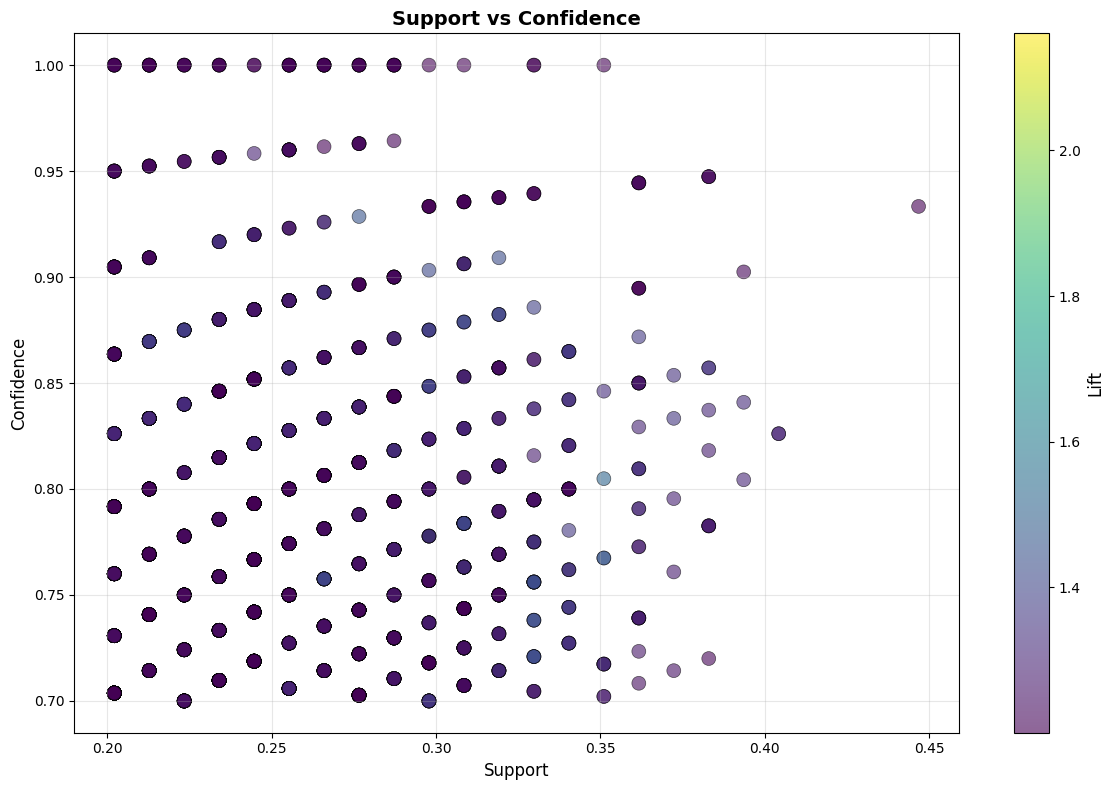

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# Scatter plot: Support vs Confidence, colored by Lift
fig, ax = plt.subplots(figsize=(12, 8))

scatter = ax.scatter(rules['support'], rules['confidence'], c=rules['lift'], s=100, alpha=0.6, cmap='viridis', edgecolors='black', linewidth=0.5)

ax.set_xlabel('Support', fontsize=12)
ax.set_ylabel('Confidence', fontsize=12)
ax.set_title('Support vs Confidence',
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Lift', fontsize=12)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

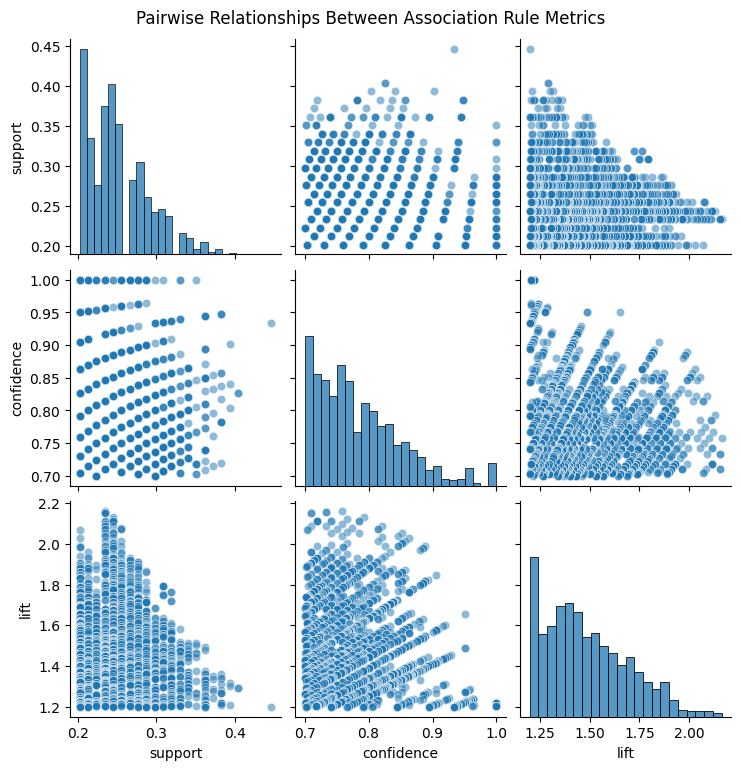

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
metrics = rules[['support', 'confidence', 'lift']]
metrics_sample = metrics[(rules['lift'] >= 1.2) & (rules['support'] >= 0.15)]

sns.pairplot(metrics_sample, diag_kind='hist', plot_kws={'alpha': 0.5})

plt.suptitle("Pairwise Relationships Between Association Rule Metrics", y=1.02)
plt.show()